## Assignment 8

#### Put your name here

- Write a bit of python code to solve a simple radioactive decay problem. A single step process with one decay rate. Plot your Result.

- We will use Radon-222 to Polonium-218 as an example. The half-life of Randon-222 is 3.8 days.
    
- Submit this file as "yourname-assignment8.ipynb" to Moodle after completing   the assignment

#### Introduction to slving ODE numerically
ODE reference - 

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.00-Numerical-Differentiation.html

ODE video - 

https://www.mathworks.com/videos/solving-odes-in-matlab-1-euler-ode1-117526.html

#### Radioactive Decay

Radioactivity is touched on in Modern Physics but not covered in depth.  Here is a review of the topic from Hyperphysics.  Hyperphysics is a reliable source and can be one of the first resources you turn to for guidance on a physics topic.

http://hyperphysics.phy-astr.gsu.edu/hbase/Nuclear/radact.html#c1

Here is a diagram for the decay chain of Radon-222 to Lead 210.

Note, you can convert from half-lives to rate constant k using the following equation k = 0.693 / t_0.5.  How would you use the basic equation for nuclear decay (exponential)to show or prove this? 

### Radon-222 decay chain
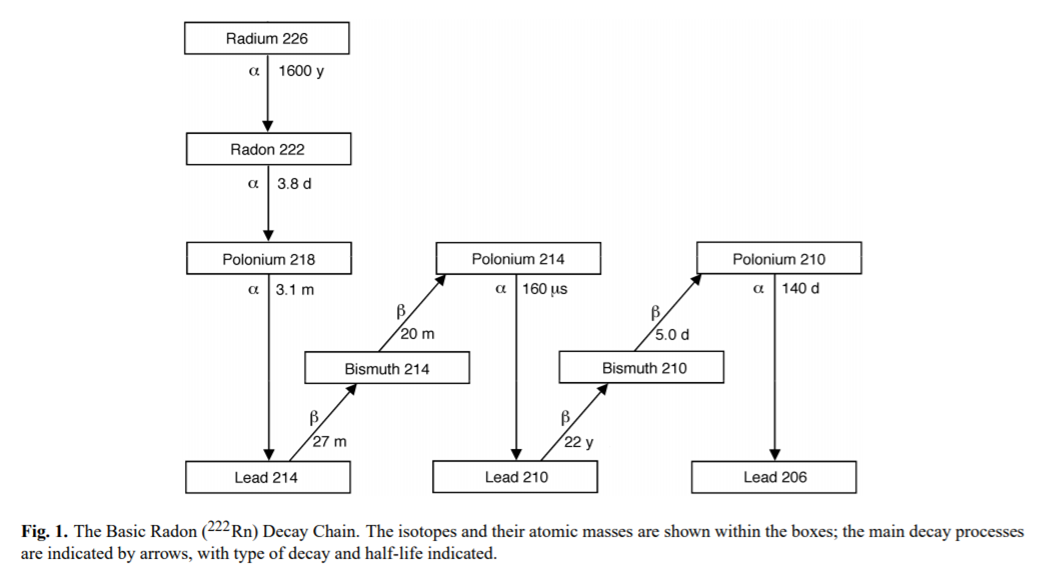

The figure was taken from this paper:

https://nhess.copernicus.org/articles/10/2051/2010/



1. Write a bit of python code to solve a simple radioactive decay problem. A single step process with one decay rate. Use your code to model Radon-222 to Polonium-218 (half-life of 3.8 days) and plot your Result.

In [2]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
#### define initial condition, delta t, and time duration
y0 = 10000 # initial value
dt = .01 # time step size
Tspan = 30 # duration
Time = np.arange(0,Tspan, dt)

t_half = 3.8
k = 0.693/t_half

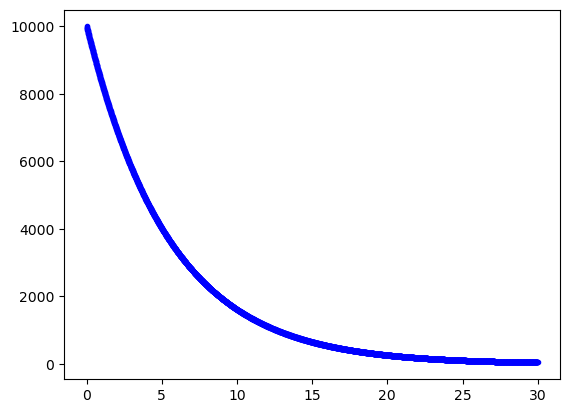

In [4]:
def dydt(y, t, k):
    return -k*y

sol = odeint(dydt, y0, Time, (k,))
Line = plt.plot(Time, sol, 'b.')

2. Now consider what sort of error there is between your solution and the actual solution.  You know the actual solution to the differential quations is a simple exponential decay.

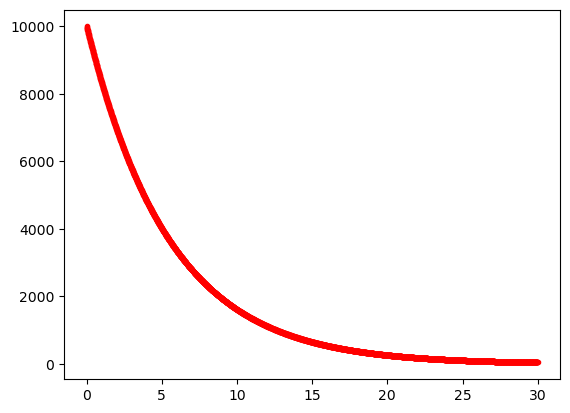

In [5]:
#Plotting the analytical solution
y_ana = y0*np.exp(-k*Time)
Line=plt.plot(Time,y_ana,'r.')

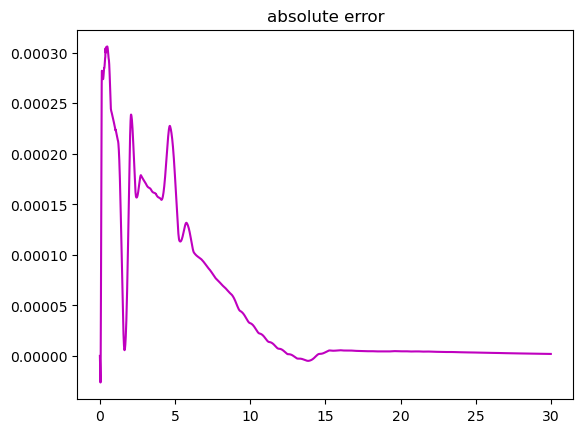

In [6]:
#Calculate difference
diff = sol.transpose()[0] - y_ana.transpose()
Line=plt.plot(Time,diff,'m-', label = "difference")
plt.title('absolute error');
#Line=plt.plot(Time,y_ana,'r.', label = "analytical")
#Line = plt.plot(Time, sol, 'b.', label = "numerical")

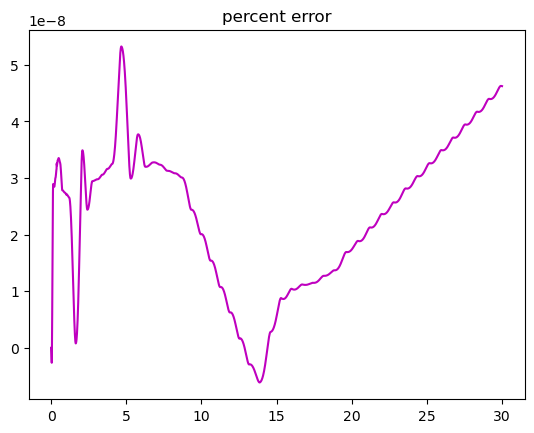

In [7]:
perc_diff = diff/y_ana
Line=plt.plot(Time,perc_diff,'m-')
plt.title('percent error');

3. Once you are confident that your solution is accurate, we will proceed to model the rest of the decay chain from Radon-222 to Lead-210 (Note we don't need to proceed farther since a half life of 22 years is pretty robust). Start with a count of 1000000 atoms of Radon-222 and show how the total count of each atomic species evolves over time.

In order to solve, we'll need to use coupled ODEs:
-  $r' = -k_r r$           
 -  $ p' = -k_p p + r' $     
 -  $ l1' = -k_{l1} l1 + p' $   
 -  $ b' = -k_b b + l1' $     
 -  $ l2' = -k_{l2} l2 + b'$    

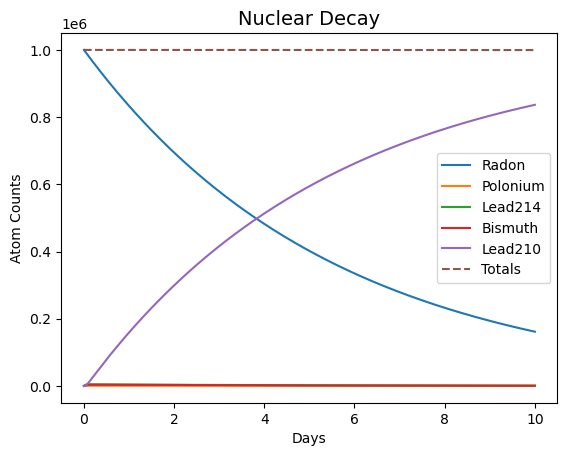

In [11]:
#define function that will accept arrays for number of atoms, time, and rate constants, and return the coupled differential equations
def decay(atoms, time, rates):
    #extract initial values
    r, p, l1, b, l2 = atoms
    #extract rate constants
    k_r, k_p, k_l1, k_b, k_l2 = rates
    #define derivatives
    drdt = -k_r*r
    dpdt = -k_p*p + k_r*r
    dl1dt = -k_l1*l1 + k_p*p
    dbdt = -k_b*b + k_l1*l1
    dl2dt = -k_l2*l2 + k_b*b
    return [drdt,dpdt,dl1dt,dbdt,dl2dt]

#define half-lives; note we are converting all to days
hl_r = 3.8
hl_p = 3.1/(60*24)
hl_l1 = 27/(60*24)
hl_b = 20/(60*24)
hl_l2 = 22*365
h_lives = [hl_r, hl_p, hl_l1, hl_b, hl_l2]

#define rate constants
rates = [0.693/hl_r, 0.693/hl_p, 0.693/hl_l1, 0.693/hl_b, 0.693/hl_l2]


#define initial quantities
r0 = 1000000
p0 = 0
l10 = 0
b0 = 0
l20 = 0
atoms = [r0,p0,l10,b0,l20]

#define time
t0 = 0
dt = .0001
Tspan = 10 
Time2 = np.arange(0,Tspan, dt)

#solve
results = odeint(decay,atoms,Time2,(rates,))

#plot
Line = plt.plot(Time2,results[:,0],Time2,results[:,1],Time2,results[:,2],Time2,results[:,3],Time2,results[:,4],Time2,results.sum(axis=1), '--')
plt.title('Nuclear Decay', fontsize=14)
plt.xlabel('Days')
plt.ylabel('Atom Counts')
_=plt.legend(['Radon', 'Polonium', 'Lead214', 'Bismuth', 'Lead210', 'Totals'])